In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [627]:
data = pd.read_csv('dados_rpm_10hz.csv')

In [628]:
resposta = data['rpm']

In [629]:
freq_de_corte = 0.1 # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada.head()
print(resposta_filtrada.iloc[300:1400].max(), resposta_filtrada.iloc[300:1400].min())

0    7200.881633
dtype: float64 0    5164.373883
dtype: float64


In [630]:
# Frequência de amostragem (baudrate)
sampling_freq = 115200.0

# Calcula o tempo de coleta de cada amostra
tempo_de_coleta = np.array(pd.read_csv('tempo_de_coleta_10hz.csv'))
print(tempo_de_coleta)

[[0.00000000e+00]
 [8.68055556e-06]
 [1.73611111e-05]
 ...
 [9.52256944e-03]
 [9.53125000e-03]
 [9.53993056e-03]]


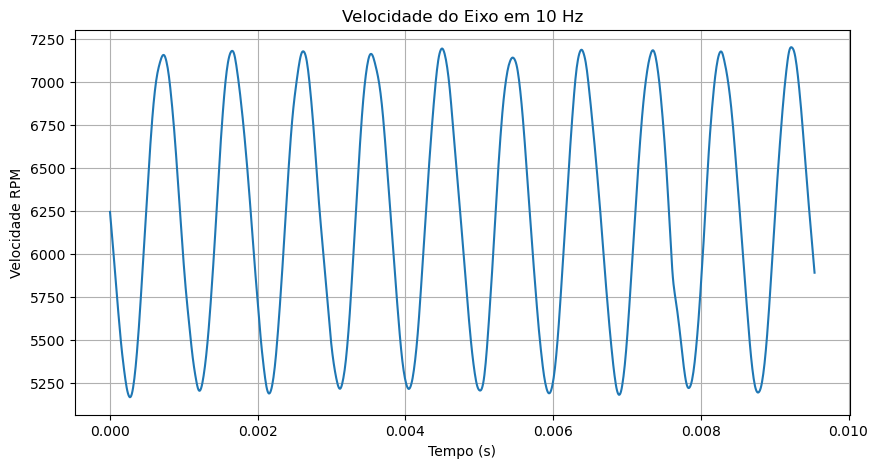

In [631]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(tempo_de_coleta, resposta_filtrada.iloc[300:1400])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

In [632]:
print(resposta_filtrada.values.flatten())

[ 552.61569825  637.69037615  724.37198049 ... 6047.86189003 6166.916238
 6287.34155949]


In [633]:
amostras = resposta_filtrada.values.flatten()
num_amostras = len(amostras)

In [634]:
import numpy as np
from scipy.signal import find_peaks

# Encontrar os índices dos picos positivos da senoide
peaks, _ = find_peaks(amostras)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo = np.mean(np.diff(peaks))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs = num_amostras_por_ciclo * 10
print(f"Frequência de amostragem estimada: {Fs} Hz")


Frequência de amostragem estimada: 997.8431372549019 Hz


In [635]:
print(resposta_filtrada.max(), resposta_filtrada.min())

0    7200.881633
dtype: float64 0   -206.635916
dtype: float64


In [636]:
t = np.arange(0, num_amostras / Fs, 1 / Fs)
t = np.array(t)
t = pd.DataFrame(t)

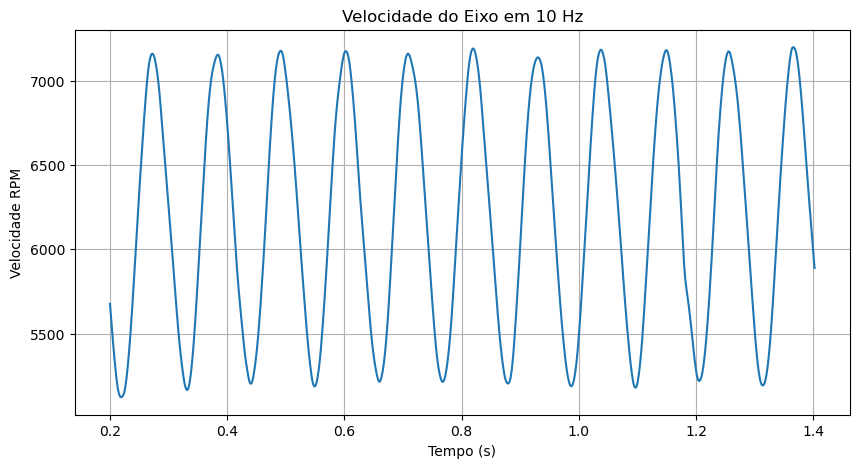

In [637]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t.iloc[200:1400], resposta_filtrada.iloc[200:1400])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

In [638]:
# Valores máximo original e desejado
max_original = 7200
max_desejado = 3300

# Calcular a constante de escala
constante_de_escala = max_desejado / max_original
print(f'Constante de Escala: {constante_de_escala}')


Constante de Escala: 0.4583333333333333


In [639]:
# Ajustar as amostras
data['amostra_ajustada'] = resposta_filtrada * constante_de_escala
data['tempo'] = t

# Exibir as primeiras linhas do DataFrame ajustado para verificar
display(data.iloc[1350:1400])


,rpm,amostra_ajustada,tempo
1350,6932.77,3151.840335,1.352918
1351,6962.03,3171.168974,1.353920
1352,7081.54,3189.347932,1.354922
1353,6903.77,3206.430368,1.355925
1354,6962.03,3222.621961,1.356927
1355,6991.53,3238.022444,1.357929
1356,7217.57,3252.491587,1.358931
1357,6932.77,3265.740413,1.359933
1358,7217.57,3277.382519,1.360935
1359,7247.90,3286.916384,1.361938


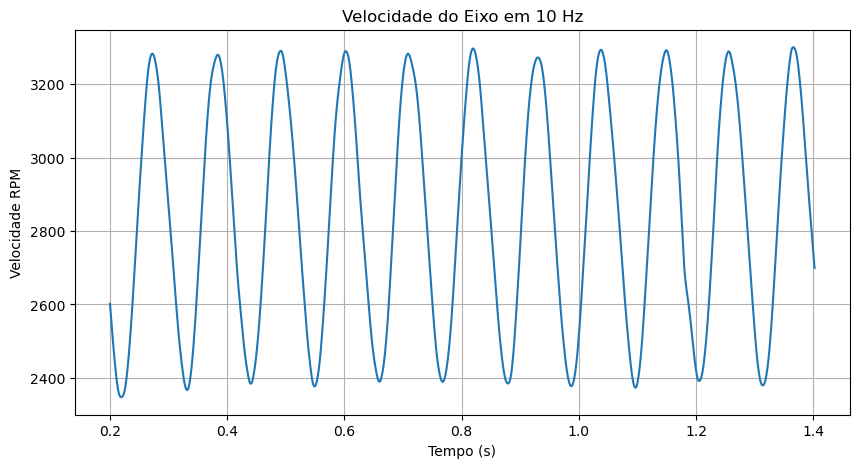

In [640]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t.iloc[200:1400], data['amostra_ajustada'].iloc[200:1400])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

In [641]:
valor_procurado = 2800

In [642]:
# Encontrar o valor mais próximo de 2800 na coluna 'amostra_ajustada' dentro do intervalo de linhas de 300 a 1400
linha_correspondente = data.loc[:1400, 'amostra_ajustada'].iloc[(data.loc[:1400, 'amostra_ajustada'] - valor_procurado).abs().idxmin()]

print(f'O valor mais próximo de 2800 na amostra ajustada é: {linha_correspondente}')



O valor mais próximo de 2800 na amostra ajustada é: 2799.9810812473784


In [643]:
# Encontrar o índice da linha onde 'amostra_ajustada' é igual a 2799.9810812473784
data_linha = data[data['amostra_ajustada'] == 2799.9810812473784].index
print(data_linha)

tempo_correspondente = data.loc[464, 'tempo']
print(tempo_correspondente)
delta_tempo = tempo_correspondente - 0.2

Index([464], dtype='int64')
0.4650029475338967


In [644]:
import math

# Frequência da senoide (em Hz)
frequencia_senoide = 10  # Suponha que a frequência seja 60 Hz

# Calcular o período da senoide
periodo_senoide = 1 / frequencia_senoide

# Valor do delta de tempo entre amostras consecutivas (em segundos)
delta_tempo = 0.26  # Suponha que o delta de tempo seja 0.26 segundos

# Calcular a defasagem em radianos
defasagem_radianos = 2 * math.pi * (delta_tempo / periodo_senoide)

# Converter a defasagem para graus
defasagem_graus = math.degrees(defasagem_radianos)

# Ajustar a defasagem para estar dentro do intervalo de -90 a 90 graus
defasagem_graus_ajustada = defasagem_graus % 360  # Trabalhamos em um círculo de 360 graus
if defasagem_graus_ajustada > 90:
    defasagem_graus_ajustada -= 180  # Subtrai 180 para transformar em um valor negativo dentro do intervalo -90 a 90

print(f'A defasagem em graus ajustada é: {defasagem_graus_ajustada}')


A defasagem em graus ajustada é: 36.0


In [645]:
import math

# Frequência da senoide (em Hz)
frequencia_senoide = 10

# Calcular o período da senoide
periodo_senoide = 1 / frequencia_senoide

# Calcular a defasagem em radianos
defasagem_radianos = 2 * math.pi * (delta_tempo / periodo_senoide)

defasagem_graus = defasagem_radianos * (180 / math.pi)

print(f'A defasagem em graus é: {defasagem_graus}')


A defasagem em graus é: 936.0
